<a href="https://colab.research.google.com/github/OsherKoren/Finance_market_analysis/blob/master/Departures_Time_Series_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

In [2]:
from pandas.tseries.offsets import MonthEnd

In [3]:
!pip install bar_chart_race

In [4]:
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
import bar_chart_race as bcr
plt.style.use('classic')
%matplotlib inline

In [5]:
from fbprophet import Prophet 
from fbprophet.diagnostics import cross_validation, performance_metrics
from fbprophet.plot import plot_cross_validation_metric, add_changepoints_to_plot

In [6]:
from statsmodels.tools.eval_measures import rmse

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



In [7]:
from google.colab import files
uploaded = files.upload()

Saving t11.xls to t11 (2).xls


Reading the flights departures data of Israelis' for the years 2003-2019

In [8]:
df1 = pd.read_excel('t11.xls', header=9 , usecols=[0,1,10], parse_dates=True)

In [9]:
df1.columns = ['Year', 'Month', 'Departures']
df1.head()

Year Month  Departures
0  2011   NaN      4387.2
1  2012   NaN      4348.6
2  2013   NaN      4756.7
3  2014   NaN      5180.7
4  2015   NaN      5891.1

#Cleaning and prepering the data

In [10]:
df1 = df1[df1['Month'].notna()]

In [11]:
df1.head()

Year Month  Departures
9    2019  I-II       953.1
10  2020*  I-II       995.3
11   2018     I       442.0
12    NaN    II       424.0
13    NaN   III       659.0

In [12]:
print('Length of df1: ' , len(df1))

Length of df1:  29


In [13]:
df1.tail()

Year Month  Departures
33    NaN    XI  550.900000
34    NaN   XII  677.000000
35  2020*     I  543.000000
36    NaN    II  452.200000
48  2020*  I-II    4.427657

In [14]:
df1 = df1[2:-3]

In [15]:
df1.fillna(method='ffill', inplace=True)
df1[8:13]

Year Month  Departures
19  2018    IX       977.1
20  2018     X       596.8
21  2018    XI       509.2
22  2018   XII       578.6
23  2019     I       491.6

In [16]:
df1.dtypes

Year           object
Month          object
Departures    float64
dtype: object

In [17]:
def xls_to_pd(sheet_name=None, header=9, usecols=[0,1,10]):
  df = pd.read_excel('t11.xls', sheet_name=sheet_name, header=header, usecols=usecols)
  df.columns = ['Year', 'Month', 'Departures']
  df = df[(df['Month'].notna())] 
  df.fillna(method='ffill', inplace=True)
  print('Length of df: ', len(df))
  
  return df

In [18]:
df2 = xls_to_pd(sheet_name='t11 (2)')

Length of df:  29


In [19]:
df2 = df2[2:-3]

In [20]:
df3 = xls_to_pd(sheet_name='t11 (3)')

Length of df:  41


In [21]:
df3 = df3[2:-3]

In [22]:
df4 = xls_to_pd(sheet_name='t11 (4)')

Length of df:  40


In [23]:
df4 = df4[2:-2]

In [24]:
df5 = xls_to_pd(sheet_name='t11 (5)')

Length of df:  51


In [25]:
df5 = df5[2:-1]

In [26]:
df6 = xls_to_pd(sheet_name='t11 (6)')

Length of df:  0


In [27]:
df6 = xls_to_pd(sheet_name='t11 (6)', header=9, usecols=[0,2,10])

Length of df:  40


In [28]:
df6 = df6[2:-2]

In [29]:
df6.tail()

Year Month  Departures
39  2005 *  VIII       485.7
40  2005 *    IX       385.9
41  2005 *     X       323.2
42  2005 *    XI       220.7
43  2005 *   XII       200.1

Combine all dataframes to one dataframe

In [30]:
df = pd.concat([df6, df5, df4, df3, df2, df1])

In [31]:
df

Year Month  Departures
8   2003     I       168.0
9   2003    II       143.1
10  2003   III       131.9
11  2003    IV       222.1
12  2003     V       196.9
..   ...   ...         ...
30  2019  VIII      1242.3
31  2019    IX       928.9
32  2019     X       844.5
33  2019    XI       550.9
34  2019   XII       677.0

[204 rows x 3 columns]

Replace Roman numbers to numbers

In [32]:
def roman_to_int(r):
    rom_val = {'I': 1, 'V': 5, 'X': 10}
    int_val = 0
    for i in range(len(r)):
        if i > 0 and rom_val[r[i]] > rom_val[r[i - 1]]:
            int_val += rom_val[r[i]] - 2 * rom_val[r[i - 1]]
        else:
            int_val += rom_val[r[i]]
    return int_val

In [33]:
df['Month'] = df['Month'].apply(roman_to_int)

In [34]:
df.head(12)

Year  Month  Departures
8   2003      1     168.000
9   2003      2     143.100
10  2003      3     131.900
11  2003      4     222.100
12  2003      5     196.900
13  2003      6     302.700
14  2003      7     514.600
15  2003      8     541.100
16  2003      9     358.700
17  2003     10     347.894
18  2003     11     191.500
19  2003     12     180.100

In [35]:
df.dtypes

Year           object
Month           int64
Departures    float64
dtype: object

In [36]:
df.reset_index(inplace=True)

In [37]:
df.drop('index', axis=1, inplace=True)

In [38]:
df[30:40]

Year  Month  Departures
30  2005 *      7     503.596
31  2005 *      8     485.700
32  2005 *      9     385.900
33  2005 *     10     323.200
34  2005 *     11     220.700
35  2005 *     12     200.100
36   2006       1     211.800
37   2006       2     188.500
38   2006       3     234.600
39   2006       4     335.600

Strip the * from the year value

In [39]:
type(df['Year'][35])

str

In [40]:
type(df['Year'][6])

int

In [41]:
df['Year'][35][0:4]

'2005'

In [42]:
df['Year'] = df['Year'].astype(str)

In [43]:
df['Year'] = df['Year'].apply(lambda x: x.strip()[0:4])

In [44]:
df['Year'][35]

'2005'

In [45]:
df['Date'] = df['Year'] + '-' + df['Month'].astype(str)

In [46]:
df.head()

Year  Month  Departures    Date
0  2003      1       168.0  2003-1
1  2003      2       143.1  2003-2
2  2003      3       131.9  2003-3
3  2003      4       222.1  2003-4
4  2003      5       196.9  2003-5

In [47]:
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m')

In [48]:
df.dtypes

Year                  object
Month                  int64
Departures           float64
Date          datetime64[ns]
dtype: object

In [49]:
df.drop(['Year', 'Month'], axis=1, inplace=True)

In [50]:
df.head()

Departures       Date
0       168.0 2003-01-01
1       143.1 2003-02-01
2       131.9 2003-03-01
3       222.1 2003-04-01
4       196.9 2003-05-01

Set the index to the end of the month

In [51]:
df.set_index('Date', inplace=True)
df.index += MonthEnd()
df.index

DatetimeIndex(['2003-01-31', '2003-02-28', '2003-03-31', '2003-04-30',
               '2003-05-31', '2003-06-30', '2003-07-31', '2003-08-31',
               '2003-09-30', '2003-10-31',
               ...
               '2019-03-31', '2019-04-30', '2019-05-31', '2019-06-30',
               '2019-07-31', '2019-08-31', '2019-09-30', '2019-10-31',
               '2019-11-30', '2019-12-31'],
              dtype='datetime64[ns]', name='Date', length=204, freq=None)

In [52]:
df.head(3)

Departures
Date                  
2003-01-31       168.0
2003-02-28       143.1
2003-03-31       131.9

#A bit of data analysis...

Plot a bar chart race animation of the departures through the years

In [53]:
years = df.copy()

In [54]:
years = pd.crosstab(df.index,
                    df.index.year,
                    df.values,
                    aggfunc='sum',
                    rownames=['Month'],
                    colnames=['Year'])

In [55]:
years.head(3)

Year         2003  2004  2005  2006  2007  ...  2015  2016  2017  2018  2019
Month                                      ...                              
2003-01-31  168.0   NaN   NaN   NaN   NaN  ...   NaN   NaN   NaN   NaN   NaN
2003-02-28  143.1   NaN   NaN   NaN   NaN  ...   NaN   NaN   NaN   NaN   NaN
2003-03-31  131.9   NaN   NaN   NaN   NaN  ...   NaN   NaN   NaN   NaN   NaN

[3 rows x 17 columns]

In [56]:
years[years.columns] = years[years.columns].fillna(0)

In [57]:
years.head(3)

Year         2003  2004  2005  2006  2007  ...  2015  2016  2017  2018  2019
Month                                      ...                              
2003-01-31  168.0   0.0   0.0   0.0   0.0  ...   0.0   0.0   0.0   0.0   0.0
2003-02-28  143.1   0.0   0.0   0.0   0.0  ...   0.0   0.0   0.0   0.0   0.0
2003-03-31  131.9   0.0   0.0   0.0   0.0  ...   0.0   0.0   0.0   0.0   0.0

[3 rows x 17 columns]

In [58]:
cumsum_years = years.cumsum(axis=0)
cumsum_years.head()

Year         2003  2004  2005  2006  2007  ...  2015  2016  2017  2018  2019
Month                                      ...                              
2003-01-31  168.0   0.0   0.0   0.0   0.0  ...   0.0   0.0   0.0   0.0   0.0
2003-02-28  311.1   0.0   0.0   0.0   0.0  ...   0.0   0.0   0.0   0.0   0.0
2003-03-31  443.0   0.0   0.0   0.0   0.0  ...   0.0   0.0   0.0   0.0   0.0
2003-04-30  665.1   0.0   0.0   0.0   0.0  ...   0.0   0.0   0.0   0.0   0.0
2003-05-31  862.0   0.0   0.0   0.0   0.0  ...   0.0   0.0   0.0   0.0   0.0

[5 rows x 17 columns]

In [59]:
fig1 = bcr.bar_chart_race(cumsum_years, n_bars=17, fixed_max=True, steps_per_period=20, period_fmt='Period: %B-%Y',
                   period_summary_func=lambda v, r: {'x':.95, 'y': .2, 's': f'Departures: {v.sum():,.0f}', 'ha': 'right', 'size': 12},
                   perpendicular_bar_func='median', figsize=(10, 5), title='Yearly Israelis Departures by air (Thousands): 2003-3019', cmap = 'tab20c'
                   )
fig1

With the exception of 2009, a year of economic recession, each year the number of Israelis' departures by air increased, reaching a peak of about 9 million in 2019. 

Plot a bar chart race animation of the departures by months

In [60]:
months = df.copy()

In [61]:
months = pd.crosstab(df.index,
                    df.index.month,
                    df.values,
                    aggfunc='sum',
                    rownames=['Year'],
                    colnames=['Month'])

In [62]:
months.columns=df.index.month_name()[:12]

In [63]:
months.head(3)

Date        January  February  March  ...  October  November  December
Year                                  ...                             
2003-01-31    168.0       NaN    NaN  ...      NaN       NaN       NaN
2003-02-28      NaN     143.1    NaN  ...      NaN       NaN       NaN
2003-03-31      NaN       NaN  131.9  ...      NaN       NaN       NaN

[3 rows x 12 columns]

In [64]:
months[months.columns] = months[months.columns].fillna(0)

In [65]:
months.head()

Date        January  February  March  ...  October  November  December
Year                                  ...                             
2003-01-31    168.0       0.0    0.0  ...      0.0       0.0       0.0
2003-02-28      0.0     143.1    0.0  ...      0.0       0.0       0.0
2003-03-31      0.0       0.0  131.9  ...      0.0       0.0       0.0
2003-04-30      0.0       0.0    0.0  ...      0.0       0.0       0.0
2003-05-31      0.0       0.0    0.0  ...      0.0       0.0       0.0

[5 rows x 12 columns]

In [66]:
cumsum_months = months.cumsum(axis=0)
cumsum_months.head()

Date        January  February  March  ...  October  November  December
Year                                  ...                             
2003-01-31    168.0       0.0    0.0  ...      0.0       0.0       0.0
2003-02-28    168.0     143.1    0.0  ...      0.0       0.0       0.0
2003-03-31    168.0     143.1  131.9  ...      0.0       0.0       0.0
2003-04-30    168.0     143.1  131.9  ...      0.0       0.0       0.0
2003-05-31    168.0     143.1  131.9  ...      0.0       0.0       0.0

[5 rows x 12 columns]

In [67]:
fig2 = bcr.bar_chart_race(cumsum_months, n_bars=12, fixed_max=True, steps_per_period=50, fixed_order=True, period_fmt='Period: %B-%Y',
                   period_summary_func=lambda v, r: {'x':.95, 'y': .2, 's': f'Departures: {v.sum():,.0f}', 'ha': 'right', 'size': 12},
                   perpendicular_bar_func='median', figsize=(10, 5), title='Monthly Israelis Departures by air (Thousands): 2003-2019', cmap = 'tab20c'
                   )
fig2

In August, the number of departures of Israelis is the highest. In February is the lowest.

In [68]:
df.reset_index(inplace=True)
df.head()

Date  Departures
0 2003-01-31       168.0
1 2003-02-28       143.1
2 2003-03-31       131.9
3 2003-04-30       222.1
4 2003-05-31       196.9

In [69]:
df.head()

Date  Departures
0 2003-01-31       168.0
1 2003-02-28       143.1
2 2003-03-31       131.9
3 2003-04-30       222.1
4 2003-05-31       196.9

In [70]:
df.columns = ['ds', 'y']

In [115]:
fig3 = px.line(df, x='ds',y='y')

fig3.update_layout(
                  title={'text': "<b>Israelies Departures by air (Thousands)<b>", 'y':0.95, 'x':0.5, 'font': {'size': 18}},
                   height = 600,
                  )

fig3.update_xaxes(showgrid=False)
fig3

There's seems to be a trend of growth over the years and a seasonality through the months

#Train, forcast, evaluate

In [72]:
train = df.iloc[:-12]
test = df.iloc[-12:]

In [73]:
m = Prophet()
m.fit(train)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [74]:
future = m.make_future_dataframe(periods=12, freq='M')
forcast = m.predict(future)

Plot the trend and the seasonality

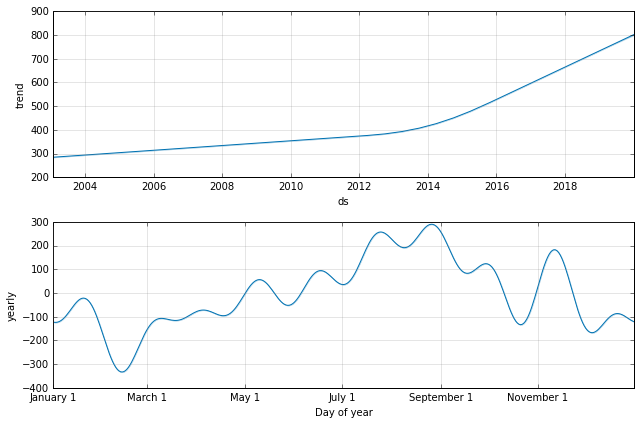

In [75]:
fig4 = m.plot_components(forcast);

Plot where the trend changes by points

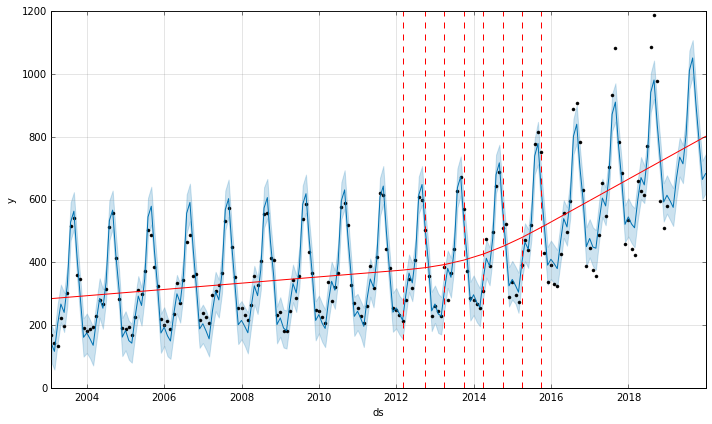

In [76]:
fig5 = m.plot(forcast)
a = add_changepoints_to_plot(fig5.gca(), m, forcast);

In [77]:
forcast.head()

ds       trend  ...  multiplicative_terms_upper        yhat
0 2003-01-31  284.420205  ...                         0.0  140.617254
1 2003-02-28  285.186302  ...                         0.0  116.072235
2 2003-03-31  286.034482  ...                         0.0  204.012160
3 2003-04-30  286.855300  ...                         0.0  266.920746
4 2003-05-31  287.703480  ...                         0.0  240.256190

[5 rows x 16 columns]

In [78]:
forcast.columns

Index(['ds', 'trend', 'yhat_lower', 'yhat_upper', 'trend_lower', 'trend_upper',
       'additive_terms', 'additive_terms_lower', 'additive_terms_upper',
       'yearly', 'yearly_lower', 'yearly_upper', 'multiplicative_terms',
       'multiplicative_terms_lower', 'multiplicative_terms_upper', 'yhat'],
      dtype='object')

In [79]:
predictions = forcast.iloc[-12:]['yhat']

In [116]:
fig6 = go.Figure()

fig6.add_scatter(x=forcast['ds'], y=forcast['yhat'], mode='lines+markers', showlegend=True,  name="Prediction") 

fig6.add_scatter(x=df['ds'], y=df['y'], mode='lines+markers', showlegend=True,  name="True Test Data") 

fig6.update_xaxes(title_text='Date')
fig6.update_yaxes(title_text='Departures (Thousands)')

fig6.update_xaxes(showgrid=False)

fig6.update_layout(
                  title={'text': "<b>Israelis Departures by air (Thousands) - Forcast VS True Data<b>", 'y':0.9, 'x':0.5, 'font': {'size': 18}},
                  height = 600,         
                  )
fig6

Most of the years the predictions are similar to the true data. But we can see the gaps in the data at the peaks and lows of several years, especially in the last years.

Plot the last year predictions and true values

In [81]:
fig7 = go.Figure()

fig7.add_scatter(x=forcast['ds'][-12:], y=forcast['yhat'][-12:], mode='lines+markers', showlegend=True,  name="Prediction") 

fig7.add_scatter(x=df['ds'][-12:], y=df['y'][-12:], mode='lines+markers', showlegend=True,  name="True Test Data") 

fig7.update_xaxes(title_text='Date')
fig7.update_yaxes(title_text='Departures (Thousands)')

fig7.update_xaxes(showgrid=False)

fig7.update_layout(
                  title={'text': "<b>Forcast VS True Data<b>", 'y':0.9, 'x':0.5, 'font': {'size': 18}},
                  height = 600        
                  )
fig7

The gaps seem to be through most of the months of the last year.



In [82]:
predictions

192     595.281651
193     575.203585
194     668.089063
195     735.783669
196     714.064666
197     806.946503
198    1011.771537
199    1051.626279
200     908.348675
201     783.250873
202     664.003155
203     682.898283
Name: yhat, dtype: float64

In [83]:
test['y']

192     491.6
193     461.5
194     551.6
195     798.7
196     656.0
197     837.4
198    1138.1
199    1242.3
200     928.9
201     844.5
202     550.9
203     677.0
Name: y, dtype: float64

Evaluate the model - By root mean square error

In [84]:
eval = rmse(predictions, test['y'])
eval

97.81860415535246

In [85]:
avg = test.mean()
avg

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning:

DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.



y    764.875
dtype: float64

In [86]:
ratio = eval/avg
ratio

y    0.127888
dtype: float64

~ 13% - gap from the mean... Not that good... 
Lets check the evaluation metric also

In [87]:
initial = 5 * 365
initial = str(initial) + ' days'
initial

'1825 days'

In [88]:
period = 5 * 365
period = str(period) + ' days'

In [89]:
horizon = 365
horizon = str(horizon) + ' days'

In [90]:
df_cv = cross_validation(m, initial=initial, period=period, horizon=horizon)

INFO:fbprophet:Making 2 forecasts with cutoffs between 2013-01-01 00:00:00 and 2017-12-31 00:00:00


In [91]:
df_cv.head(5)

ds        yhat  yhat_lower  yhat_upper      y     cutoff
0 2013-01-31  250.655309  215.322359  283.063376  244.7 2013-01-01
1 2013-02-28  238.602878  205.649393  272.504378  229.9 2013-01-01
2 2013-03-31  295.930012  263.952309  328.298616  386.0 2013-01-01
3 2013-04-30  363.294139  332.064760  397.140579  280.6 2013-01-01
4 2013-05-31  339.866134  307.575766  372.046449  365.7 2013-01-01

In [92]:
performance_metrics(df_cv).head()

horizon          mse       rmse        mae      mape     mdape  coverage
0 31 days  3123.277308  55.886289  42.382886  0.101321  0.101321       0.5
1 58 days  3143.414498  56.066162  43.756670  0.108080  0.108080       0.5
2 59 days  3575.941820  59.799179  46.411347  0.118125  0.118125       0.5
3 89 days  7594.373137  87.145701  87.094902  0.215869  0.215869       0.0
4 90 days  6634.419678  81.451947  80.938464  0.171153  0.171153       0.0

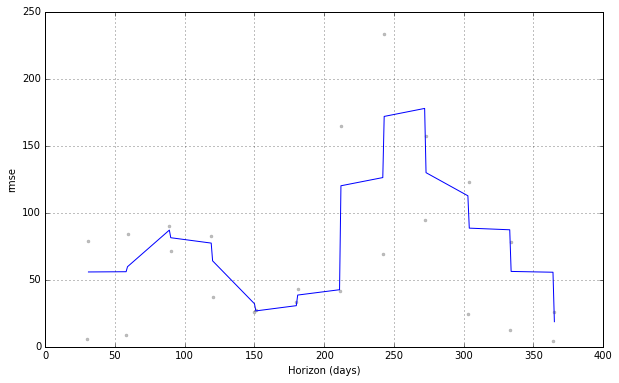

In [93]:
plot_cross_validation_metric(df_cv, metric='rmse');

At ~360 days the root mean square error is low, where at ~240 its the highest

This time I will change the seasonality_mode of the model from additive to multiplicative

In [94]:
m2 = Prophet(seasonality_mode='multiplicative')
m2.fit(train)
future2 = m2.make_future_dataframe(periods=12, freq='M')
forcast2 = m2.predict(future2)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


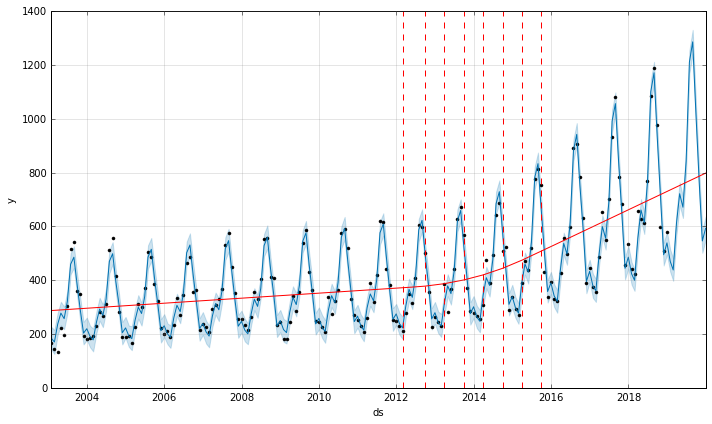

In [95]:
fig8 = m2.plot(forcast2)
a = add_changepoints_to_plot(fig8.gca(), m2, forcast2);

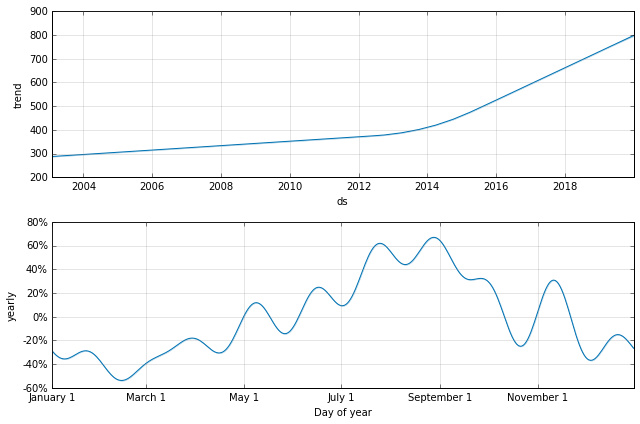

In [96]:
fig9 = m2.plot_components(forcast2);

In [97]:
predictions2 = forcast2.iloc[-12:]['yhat']

In [117]:
fig10 = go.Figure()

fig10.add_scatter(x=forcast2['ds'], y=forcast2['yhat'], mode='lines+markers', showlegend=True,  name="Prediction") 

fig10.add_scatter(x=df['ds'], y=df['y'], mode='lines+markers', showlegend=True,  name="True Test Data") 

fig10.update_xaxes(title_text='Date')
fig10.update_yaxes(title_text='Departures (Thousands)')

fig10.update_xaxes(showgrid=False)

fig10.update_layout(
                  title={'text': "<b>Israelies Departures by air (Thousands) - Forcast VS True Data<b>", 'y':0.9, 'x':0.5, 'font': {'size': 18}},
                  height = 600,         
                  )
fig10

Much better...

Plot last year

In [99]:
fig11 = go.Figure()

fig11.add_scatter(x=forcast2['ds'][-12:], y=forcast2['yhat'][-12:], mode='lines+markers', showlegend=True,  name="Prediction") 

fig11.add_scatter(x=df['ds'][-12:], y=df['y'][-12:], mode='lines+markers', showlegend=True,  name="True Test Data") 

fig11.update_xaxes(title_text='Date')
fig11.update_yaxes(title_text='Departures (Thousands)')

fig11.update_xaxes(showgrid=False)

fig11.update_layout(
                  title={'text': "<b>Forcast VS True Data<b>", 'y':0.9, 'x':0.5, 'font': {'size': 18}},
                  height = 600        
                  )
fig11

Looks better ... Let's evaluate...

In [100]:
eval2 = rmse(predictions2, test['y'])
eval2

57.85766079631664

In [101]:
ratio2 = eval2/avg
ratio2

y    0.075643
dtype: float64

Much better than the additive mode evaluation result

In [102]:
df_cv2 = cross_validation(m2, initial=initial, period=period, horizon=horizon)

INFO:fbprophet:Making 2 forecasts with cutoffs between 2013-01-01 00:00:00 and 2017-12-31 00:00:00


In [103]:
df_cv2.head()

ds        yhat  yhat_lower  yhat_upper      y     cutoff
0 2013-01-31  235.288862  201.853796  267.766766  244.7 2013-01-01
1 2013-02-28  220.696504  187.298550  253.598330  229.9 2013-01-01
2 2013-03-31  288.116559  255.166146  322.963087  386.0 2013-01-01
3 2013-04-30  364.000161  331.441951  397.787555  280.6 2013-01-01
4 2013-05-31  337.154073  306.157752  370.979653  365.7 2013-01-01

In [104]:
performance_metrics(df_cv2).head()

horizon           mse        rmse         mae      mape     mdape  coverage
0 31 days    351.737775   18.754673   17.104219  0.047281  0.047281       1.0
1 58 days    349.805184   18.703080   17.000398  0.048068  0.048068       1.0
2 59 days    543.268584   23.308123   20.427620  0.057341  0.057341       1.0
3 89 days   5291.500459   72.742700   64.767592  0.164117  0.164117       0.5
4 90 days  13083.724230  114.384108  113.335588  0.224507  0.224507       0.0

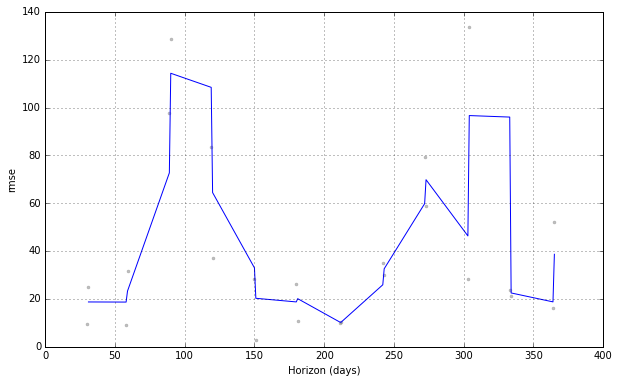

In [105]:
plot_cross_validation_metric(df_cv2, metric='rmse');

Add holidays to the model

In [106]:
m3 = Prophet(seasonality_mode='multiplicative')
m3.add_country_holidays(country_name='IL')
m3.fit(train)
future3 = m3.make_future_dataframe(periods=12, freq='M')
forcast3 = m3.predict(future3)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


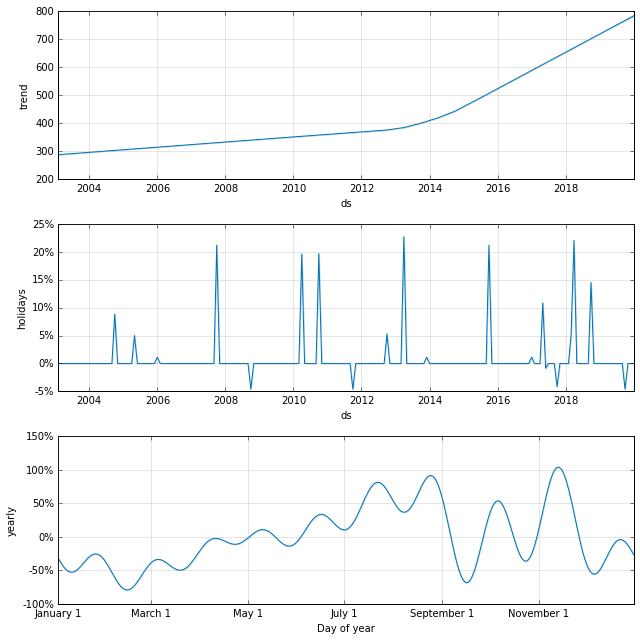

In [107]:
fig12 = m3.plot_components(forcast3);

In [108]:
predictions3 = forcast3.iloc[-12:]['yhat']

In [109]:
eval3 = rmse(predictions3, test['y'])
eval3

54.03722151576832

In [110]:
ratio3 = eval3/avg
ratio3

y    0.070648
dtype: float64

Now lets use the whole data for training with model3 and then predict the future

In [111]:
m_final = Prophet(seasonality_mode='multiplicative')
m_final.add_country_holidays(country_name='IL')
m_final.fit(df)
future_2020 = m_final.make_future_dataframe(periods=12, freq='M')
forcast_2020 = m_final.predict(future_2020)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [112]:
predictions_2020 = forcast_2020.iloc[-12:]['yhat']

In [113]:
fig13 = go.Figure()

fig13.add_scatter(x=forcast_2020['ds'][-24:], y=forcast_2020['yhat'][-24:], mode='lines+markers', showlegend=True,  name="Predictions") 

fig13.add_scatter(x=df['ds'][-12:], y=df['y'][-12:], mode='lines+markers', showlegend=True,  name="True Test Data") 

fig13.update_xaxes(title_text='Date')
fig13.update_yaxes(title_text='Departures (Thousands)')

fig13.update_xaxes(showgrid=False)

fig13.update_layout(
                  title={'text': "<b>Israelies Departures by air Forcast (Thousands)<b>", 'y':0.9, 'x':0.5, 'font': {'size': 18}},
                  height = 600        
                  )
fig13

### **Well, if there was no Covid-19 in the year 2020 ...**